In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 加载数据
data = pd.read_csv('datasets/pima-indians-diabetes/diabetes.csv')
print('dataset shape {}'.format(data.shape))
data.head()

dataset shape (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [4]:
X = data.iloc[:, 0:8]
Y = data.iloc[:, 8]
print('shape of X {}; shape of Y {}'.format(X.shape, Y.shape))

shape of X (768, 8); shape of Y (768,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2);

In [6]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

models = []
models.append(("KNN", KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights", KNeighborsClassifier(
    n_neighbors=2, weights="distance")))
models.append(("Radius Neighbors", RadiusNeighborsClassifier(
    n_neighbors=2, radius=500.0)))

In [7]:
results = []
for name, model in models:
    model.fit(X_train, Y_train)
    results.append((name, model.score(X_test, Y_test)))
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0],results[i][1]))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, outlier_label=None, p=2,
             radius=500.0, weights='uniform')

name: KNN; score: 0.6493506493506493
name: KNN with weights; score: 0.6623376623376623
name: Radius Neighbors; score: 0.577922077922078


In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X, Y, cv=kfold)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(
        results[i][0],results[i][1].mean()))

name: KNN; cross val score: 0.7147641831852358
name: KNN with weights; cross val score: 0.6770505809979495
name: Radius Neighbors; cross val score: 0.6497265892002735


## 模型训练

In [9]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)
print("train score: {}; test score: {}".format(train_score, test_score))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

train score: 0.8420195439739414; test score: 0.6493506493506493


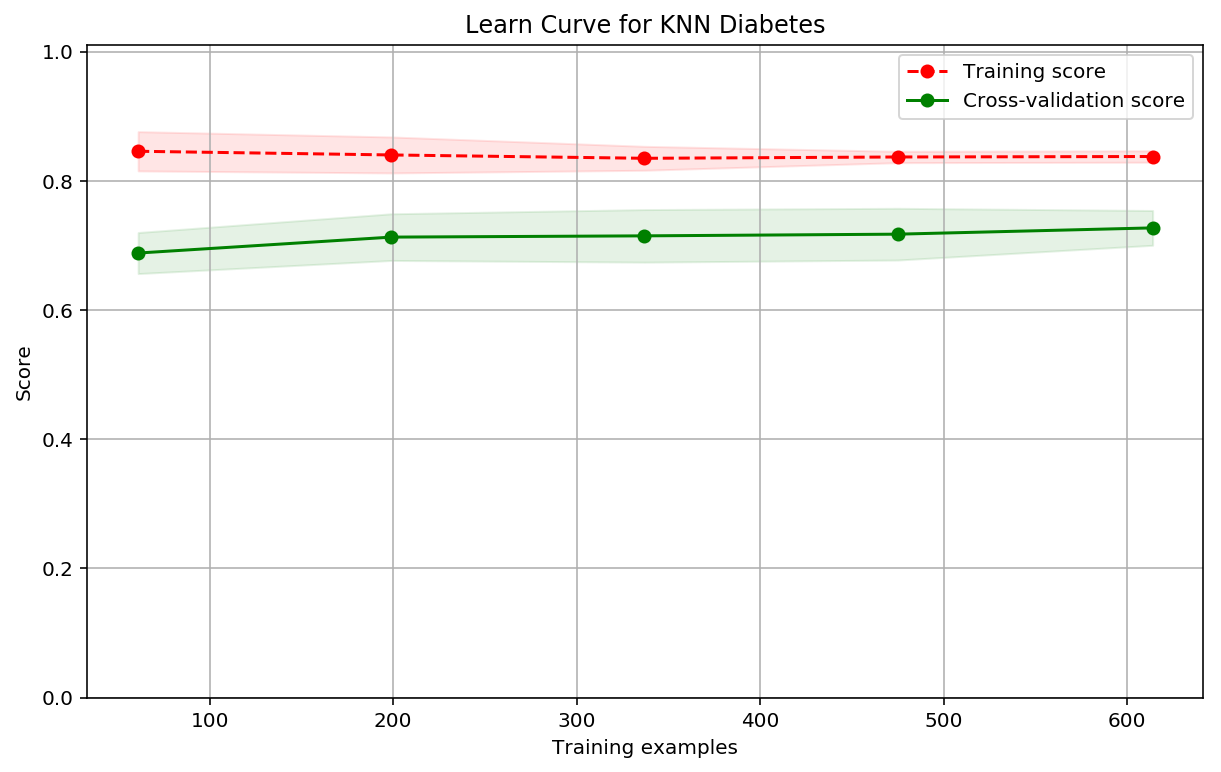

In [11]:
from sklearn.model_selection import ShuffleSplit
from common.utils import plot_learning_curve

knn = KNeighborsClassifier(n_neighbors=2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(10, 6))
plot_learning_curve(plt, knn, "Learn Curve for KNN Diabetes", 
                    X, Y, ylim=(0.0, 1.01), cv=cv);

## 数据可视化

In [12]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
X_new = selector.fit_transform(X, Y)
X_new[0:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

In [13]:
results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X_new, Y, cv=kfold)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(
        results[i][0],results[i][1].mean()))

name: KNN; cross val score: 0.725205058099795
name: KNN with weights; cross val score: 0.6900375939849623
name: Radius Neighbors; cross val score: 0.6510252904989747


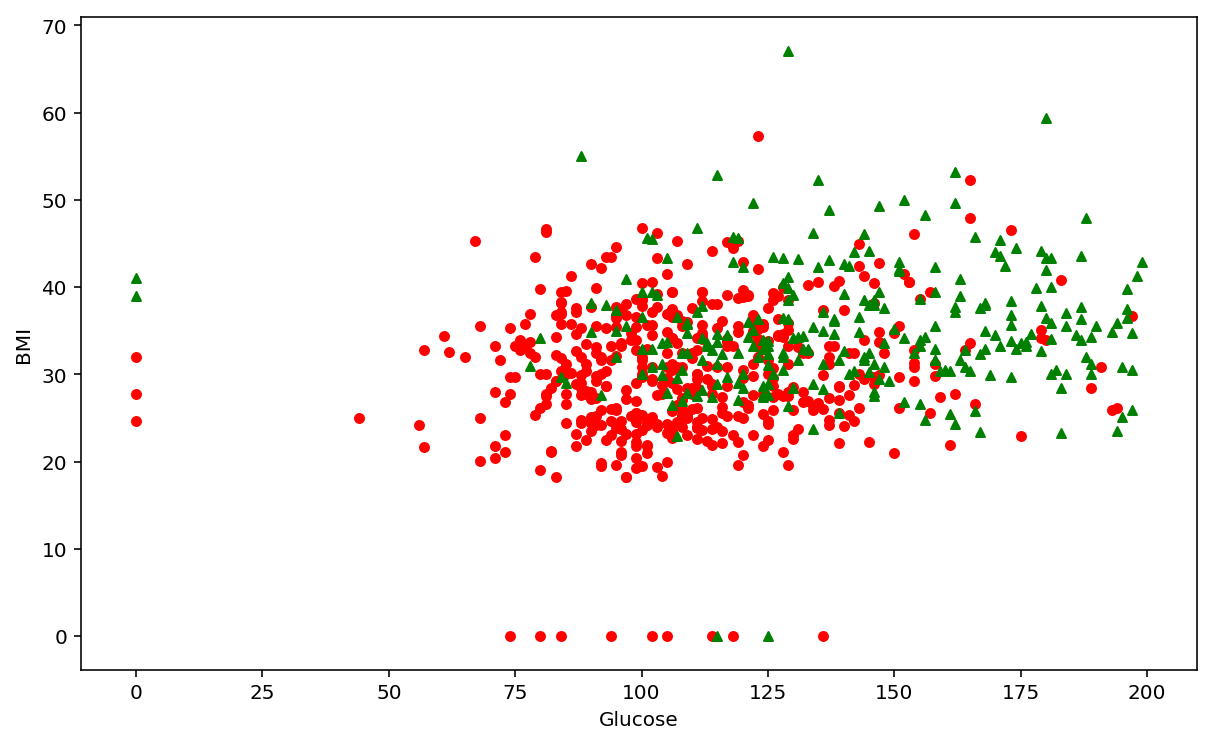

In [14]:
# 画出数据
plt.figure(figsize=(10, 6))
plt.ylabel("BMI")
plt.xlabel("Glucose")
plt.scatter(X_new[Y==0][:, 0], X_new[Y==0][:, 1], c='r', s=20, marker='o');         # 画出样本
plt.scatter(X_new[Y==1][:, 0], X_new[Y==1][:, 1], c='g', s=20, marker='^');         # 画出样本